In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.3 MB/s eta 0:00:00


In [2]:
from textblob import Word
import nltk
nltk.data.path.append("/kaggle/working/")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Libraray for Data Manipulation
import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library for preprocessing 
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag

# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential,Model
#from attention import BahdanauAttention
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention, Input
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam

#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/english-hindi-dataset/Dataset_English_Hindi.csv


In [6]:
data = pd.read_csv('/kaggle/input/english-hindi-dataset/Dataset_English_Hindi.csv')

In [7]:
data.sample(5)

,English,Hindi
58314,"But I learned something more profound than that,",लेकिन मैने इससे भी अधिक और गहरा कुछ सीखा
72682,2. Classical music : Uttar Pradesh has a tradi...,२- शास्त्रीय संगीत : उत्तर प्रदेश उत्तक्रिष्ठ ...
18640,To protect his wicket the batsman uses a woode...,अपने विकेट की रक्षा करने के लिए बल्लेबाज लकड़ी...
2542,The factory will cease operations next month.,फ़ैक्टरी में काम अगले महीने से रुक जाएगा।
80105,8 . The financial costs came in paying for cri...,"8 . वित्तीय खर्चों के कारण थे - अपराध , स्कूल ..."


In [8]:
print("dataset shape: ",data.shape)

dataset shape:  (130476, 2)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130476 entries, 0 to 130475
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  130474 non-null  object
 1   Hindi    130164 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [10]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  2788


In [11]:
missing_data = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(data))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
English,2,0.00
Hindi,312,0.24


In [12]:
round(data.describe().T,2)

,count,unique,top,freq
English,130474,126959,(Laughter),555
Hindi,130164,100228,(हँसी),212


In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data.dropna(inplace = True)

In [15]:
data['English'] = data['English'].str.lower()

In [16]:
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [17]:
data['English'] = data['English'].apply(remove_html_tags)

In [18]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

data['English'] = data['English'].apply(remove_url)
data['Hindi'] = data['Hindi'].apply(remove_url)

In [19]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}

In [20]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [21]:
data['English'] = data['English'].apply(chat_conversion)

In [22]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [23]:
data['English'] = data['English'].apply(remove_emoji)
data['Hindi'] = data['Hindi'].apply(remove_emoji)

In [24]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

data['English'] = data['English'].apply(expand_contractions)

In [26]:
def preprocess_text(text, language='english'):
    if not isinstance(text, str):
        return text
    
    if language == 'english':
        pattern = re.compile(r'[^a-zA-Z0-9\s]')
        return pattern.sub(r'', text)
    elif language == 'hindi':
        pattern = re.compile(r'[^\u0900-\u097F\s]')
        return pattern.sub(r'', text)
    else:
        raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")
        
data['English'] = data['English'].apply(lambda x: preprocess_text(x, language='english'))
data['Hindi'] = data['Hindi'].apply(lambda x: preprocess_text(x, language='hindi'))

data.sample(5)

,English,Hindi
56735,but when that food is there,मगर जब यह खाना मौजूद है
121171,on 2 june 2007 faizabad court ordered that he had,२ जून २००७ फैजाबाद अदालत ने इन्हें आदेश दिया क...
21059,we analysed relevant data and worked with the ...,हम ने संगत आकडों का विश्लेषण किया वेतन की घटना...
91854,his influence was limited to the bombay presid...,उनका प्रभाव बंबई प्रेसिडेंसी तक और इसके अलावा ...
119250,about our women about our politics,हमारी स्त्रियों के बारे में हमारी राजनीति के ब...


In [27]:
# Function to preprocess text and generate word cloud
def generate_wordcloud(text_list, language):
    # Join the list of words into a single string
    text_str = ' '.join(map(str, text_list))
    
    # Generate word cloud without specifying font path
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_str)
    
    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {language} Text")
    plt.axis('off')
    plt.show()

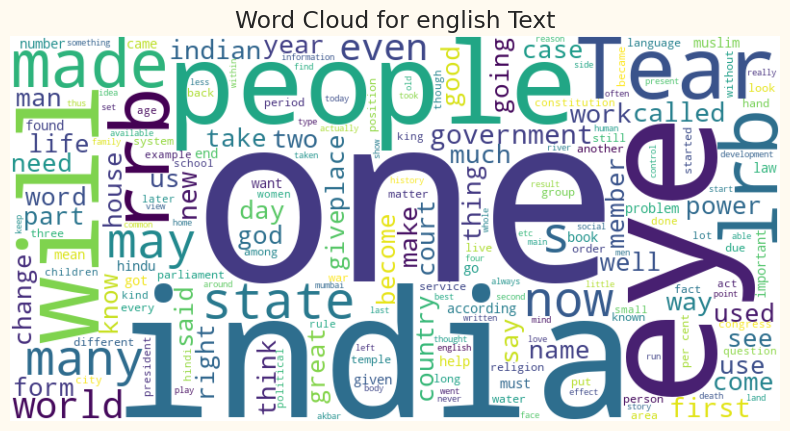

In [28]:
# Generate word clouds for English and Hindi columns
generate_wordcloud(data['English'], 'english')

In [29]:
data.shape

(127375, 2)

In [30]:
data = data[data['English'].str.len() <= 50]

In [31]:
data.shape

(50157, 2)

In [32]:
# Add <start> and <end> tokens to Hindi sentences
data['Hindi'] = ['<start> ' + sentence + ' <end>' for sentence in data['Hindi']]

In [33]:
tok = Tokenizer()
tok.fit_on_texts(data['English'])

In [34]:
tok_hindi = Tokenizer()
tok_hindi.fit_on_texts(data['Hindi'])

In [38]:
len(tok.word_index),len(tok_hindi.word_index)

(22870, 24779)

In [39]:
tok.document_count

50157

In [40]:
data['English'] = tok.texts_to_sequences(data['English'])
data['Hindi'] = tok_hindi.texts_to_sequences(data['Hindi'])

In [41]:
data

,English,Hindi
0,[148],"[1, 13034, 2]"
1,[2853],"[1, 13035, 2]"
2,[2853],"[1, 13036, 2]"
3,[2853],"[1, 4577, 2]"
4,[3819],"[1, 9695, 2]"
...,...,...
130461,"[62, 52, 9, 14, 6, 964, 157]","[1, 99, 49, 21, 11, 1833, 164, 9, 2]"
130462,"[1, 22869, 14, 10094, 27, 4615]","[1, 107, 2948, 9445, 17, 3284, 8, 3267, 45, 52..."
130464,"[5, 48, 13, 95, 10, 4, 253, 56, 459]","[1, 84, 22, 180, 9, 14, 13, 1285, 840, 2]"
130466,"[364, 46, 16, 212, 345]","[1, 1123, 36, 34, 1341, 15, 7, 16, 2]"


In [42]:
def calculate_max_sequence_length(eng,hindi):
    max_length_combined = max(max(len(seq) for seq in eng), max(len(seq) for seq in hindi))

    return max_length_combined

max_length_combined = calculate_max_sequence_length(data['English'],data['Hindi'])
max_length_combined

260

In [43]:
for num in data['English'][0]:
    print(num, end=' ')

148 

In [44]:
# Print corresponding words horizontally
for num in data['English'][0]:
    word = tok.index_word.get(num, 'UNK')  
    print(word, end=' ')

help 

In [45]:
for num in data['Hindi'][0]:
    word = tok_hindi.index_word.get(num)
    print(word,end = " ")

start बचाओ end 

In [46]:
hindi = data['Hindi']
english = data['English']

In [47]:
x = pad_sequences(english,maxlen = max_length_combined,padding = 'post')
y = pad_sequences(hindi,maxlen = max_length_combined,padding = 'post')

In [48]:
x

array([[ 148,    0,    0, ...,    0,    0,    0],
       [2853,    0,    0, ...,    0,    0,    0],
       [2853,    0,    0, ...,    0,    0,    0],
       ...,
       [   5,   48,   13, ...,    0,    0,    0],
       [ 364,   46,   16, ...,    0,    0,    0],
       [   2,  189,   12, ...,    0,    0,    0]], dtype=int32)

In [49]:
y

array([[    1, 13034,     2, ...,     0,     0,     0],
       [    1, 13035,     2, ...,     0,     0,     0],
       [    1, 13036,     2, ...,     0,     0,     0],
       ...,
       [    1,    84,    22, ...,     0,     0,     0],
       [    1,  1123,    36, ...,     0,     0,     0],
       [    1,     6,    41, ...,     0,     0,     0]], dtype=int32)

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
# Check the shape of the resulting arrays
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (40125, 260)
Shape of x_test: (10032, 260)
Shape of y_train: (40125, 260)
Shape of y_test: (10032, 260)


In [52]:
max_length_input = x_train.shape[1]
max_length_output = y_train.shape[1]
input_vocab_size = len(tok.word_index) + 1
output_vocab_size = len(tok_hindi.word_index) + 1

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(156, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(156, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 260, 260)  │  5,946,460 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 260, 260)  │  6,442,800 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 156),     │    260,208 │ embedding[0][0]   │
│                     │ (None, 156),      │            │                   │
│                     │ (None, 156)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_1[0][0… │
│                     │ 156), (None,      │            │ lstm[0][1],       │
│                     │ 156), (None,      │            │ lstm[0][2]        │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 260,       │  3,890,460 │ lstm_1[0][0]      │
│                     │ 24780)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,800,136 (64.09 MB)

 Trainable params: 16,800,136 (64.09 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],# Exclude last token from decoder input
    y=y_train,   # Exclude first token from decoder target
    batch_size=32,
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],  
)

Epoch 1/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 228s 179ms/step - accuracy: 0.9666 - loss: 0.9031 - val_accuracy: 0.9836 - val_loss: 0.1323
Epoch 2/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 224s 179ms/step - accuracy: 0.9850 - loss: 0.1213 - val_accuracy: 0.9894 - val_loss: 0.0914
Epoch 3/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 224s 179ms/step - accuracy: 0.9903 - loss: 0.0833 - val_accuracy: 0.9929 - val_loss: 0.0650
Epoch 4/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 224s 179ms/step - accuracy: 0.9935 - loss: 0.0577 - val_accuracy: 0.9949 - val_loss: 0.0487
Epoch 5/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 225s 179ms/step - accuracy: 0.9953 - loss: 0.0419 - val_accuracy: 0.9960 - val_loss: 0.0383


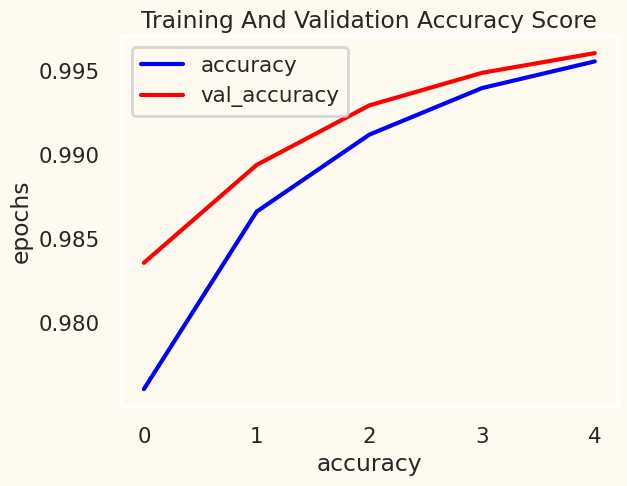

In [54]:
plt.plot(history.history['accuracy'],color = 'blue',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'val_accuracy')
plt.title("Training And Validation Accuracy Score")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

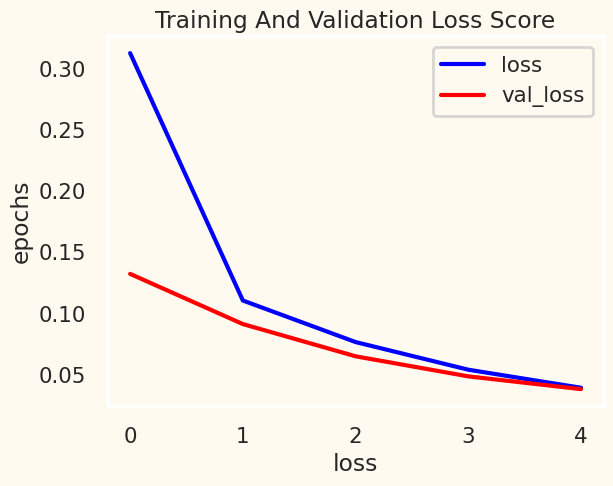

In [55]:
plt.plot(history.history['loss'],color = 'blue',label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'val_loss')
plt.title("Training And Validation Loss Score")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

In [70]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')

import numpy as np
import os
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')

# Calculate the BLEU score

# Get the ground truth Hindi sentences from the test data (remove padding tokens and special tokens)
actual_hindi_sentences = []
for sample in y_test_padded_subset:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    actual_hindi_sentences.append(sentence)

# Define a function to calculate BLEU score
def calculate_bleu_score(references, predictions):
    references = [nltk.word_tokenize(ref) for ref in references]
    predictions = [nltk.word_tokenize(pred) for pred in predictions]
    
    bleu_scores = []
    smoothing_function = SmoothingFunction().method4  # Using method 4 smoothing
    for ref, pred in zip(references, predictions):
        score = sentence_bleu([ref], pred, smoothing_function=smoothing_function)
        bleu_scores.append(score)
    
    return sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0

# Calculate the BLEU score
bleu_score = calculate_bleu_score(actual_hindi_sentences, predicted_sentences)
print(f"Average BLEU Score: {bleu_score}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Shape of predictions: (10, 260, 24780)
Shape of predicted_tokens: (10, 260)
English sentence 1: sanskrit is the mother of all indian languages
Predicted Hindi translation 1: संस्कृत सभी भारतीय भाषाओं की माता है।

English sentence 2: so essentially it knows where to go
Predicted Hindi translation 2: तो अनिवार्य रूप से यह जानता है कहाँ जाना है

English sentence 3: i lost my best friend to a car accident
Predicted Hindi translation 3: तब मैंने अपने सबसे अच्छे मित्र को सड़क दुर्घटना में खो दिया

English sentence 4: clinics are listed in telephone directories
Predicted Hindi translation 4: इन दूरसंचार की सूची जलापूर्ति जलापूर्ति में मिल जाएगी

English sentence 5: i do not think in language
Predicted Hindi translation 5: मै भाषा मे नही सोचती

English sentence 6: and some of the stuff you saw there
Predicted Hindi translation 6: और उसका एक हिस्सा आपने अभी देखा।

English sentence 7: 10 in a row you move on
Predicted Hindi translation 7: जब सवाल सही हो जाये

In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention, Concatenate
from tensorflow.keras.models import Model

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(156, return_sequences=True, return_state=True)  # Ensure return_sequences=True
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(156, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Attention Layer
attention = Attention()([decoder_outputs, encoder_outputs])

# Concatenate attention output with decoder outputs
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention])

# Dense Layer for output prediction
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 260, 260)  │  5,946,460 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 260, 260)  │  6,442,800 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_2[0][0] │
│                     │ 156), (None,      │            │                   │
│                     │ 156), (None,      │            │                   │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_3[0][0… │
│                     │ 156), (None,      │            │ lstm_2[0][1],     │
│                     │ 156), (None,      │            │ lstm_2[0][2]      │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 260, 156)  │          0 │ lstm_3[0][0],     │
│ (Attention)         │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 260, 312)  │          0 │ lstm_3[0][0],     │
│ (Concatenate)       │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 260,       │  7,756,140 │ concatenate[0][0] │
│                     │ 24780)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,665,816 (78.83 MB)

 Trainable params: 20,665,816 (78.83 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],# Exclude last token from decoder input
    y=y_train,   # Exclude first token from decoder target
    batch_size=32,
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],  
)

Epoch 1/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 268s 212ms/step - accuracy: 0.9688 - loss: 0.6387 - val_accuracy: 0.9863 - val_loss: 0.1174
Epoch 2/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 266s 212ms/step - accuracy: 0.9882 - loss: 0.1022 - val_accuracy: 0.9922 - val_loss: 0.0730
Epoch 3/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 266s 212ms/step - accuracy: 0.9930 - loss: 0.0635 - val_accuracy: 0.9949 - val_loss: 0.0511
Epoch 4/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 266s 212ms/step - accuracy: 0.9954 - loss: 0.0419 - val_accuracy: 0.9962 - val_loss: 0.0388
Epoch 5/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 266s 212ms/step - accuracy: 0.9968 - loss: 0.0281 - val_accuracy: 0.9971 - val_loss: 0.0308


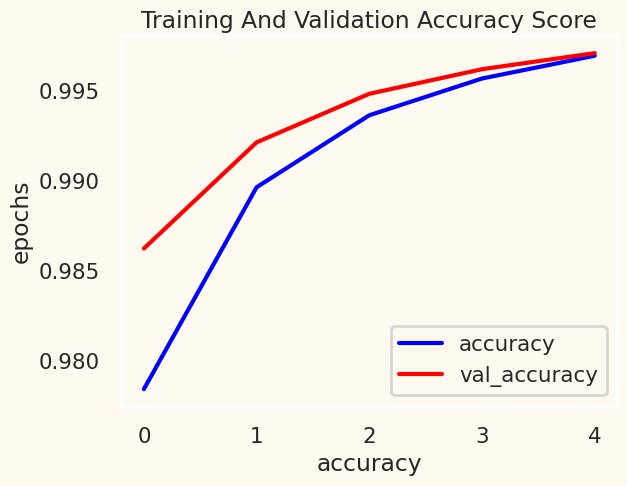

In [59]:
plt.plot(history.history['accuracy'],color = 'blue',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'val_accuracy')
plt.title("Training And Validation Accuracy Score")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

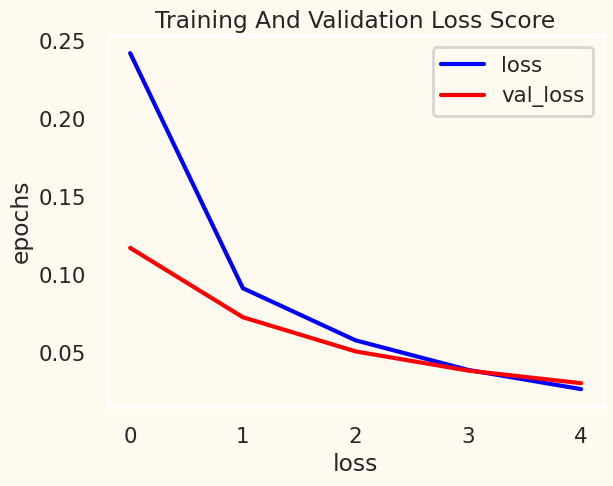

In [60]:
plt.plot(history.history['loss'],color = 'blue',label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'val_loss')
plt.title("Training And Validation Loss Score")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

In [69]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')

import numpy as np
import os
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')

# Calculate the BLEU score

# Get the ground truth Hindi sentences from the test data (remove padding tokens and special tokens)
actual_hindi_sentences = []
for sample in y_test_padded_subset:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    actual_hindi_sentences.append(sentence)

# Define a function to calculate BLEU score
def calculate_bleu_score(references, predictions):
    references = [nltk.word_tokenize(ref) for ref in references]
    predictions = [nltk.word_tokenize(pred) for pred in predictions]
    
    bleu_scores = []
    smoothing_function = SmoothingFunction().method4  # Using method 4 smoothing
    for ref, pred in zip(references, predictions):
        score = sentence_bleu([ref], pred, smoothing_function=smoothing_function)
        bleu_scores.append(score)
    
    return sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0

# Calculate the BLEU score
bleu_score = calculate_bleu_score(actual_hindi_sentences, predicted_sentences)
print(f"Average BLEU Score: {bleu_score}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Shape of predictions: (10, 260, 24780)
Shape of predicted_tokens: (10, 260)
English sentence 1: sanskrit is the mother of all indian languages
Predicted Hindi translation 1: संस्कृत सभी भारतीय भाषाओं की माता है।

English sentence 2: so essentially it knows where to go
Predicted Hindi translation 2: तो अनिवार्य रूप से यह जानता है कहाँ जाना है

English sentence 3: i lost my best friend to a car accident
Predicted Hindi translation 3: तब मैंने अपने सबसे अच्छे मित्र को सड़क दुर्घटना में खो दिया

English sentence 4: clinics are listed in telephone directories
Predicted Hindi translation 4: इन दूरसंचार की सूची जलापूर्ति जलापूर्ति में मिल जाएगी

English sentence 5: i do not think in language
Predicted Hindi translation 5: मै भाषा मे नही सोचती

English sentence 6: and some of the stuff you saw there
Predicted Hindi translation 6: और उसका एक हिस्सा आपने अभी देखा।

English sentence 7: 10 in a row you move on
Predicted Hindi translation 7: जब सवाल सही हो जाये

In [63]:
# Save the entire model
model.save('encoder_decoder_model.h5')
print('Model saved succesfully!!')

Model saved succesfully!!
